We import the <a href='https://github.com/twitter/BreakoutDetection'> BreakoutDetection</a> package built by Twitter's developers to analyze the break-outs in the time series, in order to detect early changes in user engagement in live events. In our case, we assumed the breakouts as an anomalies, signs that the machines required attention. The underlying algorithm, <b>E-Divisive with Medians (EDM)</b> , is able to detect two characteristics of a break-out, i.e. <ol><li> mean shift <li>ramp up. 

In [1]:
devtools::install_github("twitter/BreakoutDetection")
library(BreakoutDetection)

from URL https://api.github.com/repos/twitter/BreakoutDetection/zipball/master
Installing BreakoutDetection
Installing Rcpp
'/anaconda3/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/private/var/folders/2b/wdhcn0hx77v4pfq876sd0lxm0000gp/T/RtmpiVaz1Z/devtools29fd254f09e1/Rcpp'  \
  --library='/anaconda3/lib/R/library' --install-tests 

'/anaconda3/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/private/var/folders/2b/wdhcn0hx77v4pfq876sd0lxm0000gp/T/RtmpiVaz1Z/devtools29fd49af31ca/twitter-BreakoutDetection-7ae3fc4'  \
  --library='/anaconda3/lib/R/library' --install-tests 



In [2]:
df <- read.csv('agg_1min_corrected/RBG1_idle_wheel_V_eff.csv')

In [3]:
rbg1_idle_wheel <- na.omit(df, 1)

In [5]:
head(rbg1_idle_wheel)

end_time,ifm_analysis_sensordata_for_datathon_final.realvalue
2016-09-02 15:26:00,2.181357
2016-09-02 15:27:00,2.833857
2016-09-02 18:14:00,3.158684
2016-09-02 18:15:00,2.781500
2016-09-06 10:05:00,3.273524
2016-09-06 10:08:00,3.268100


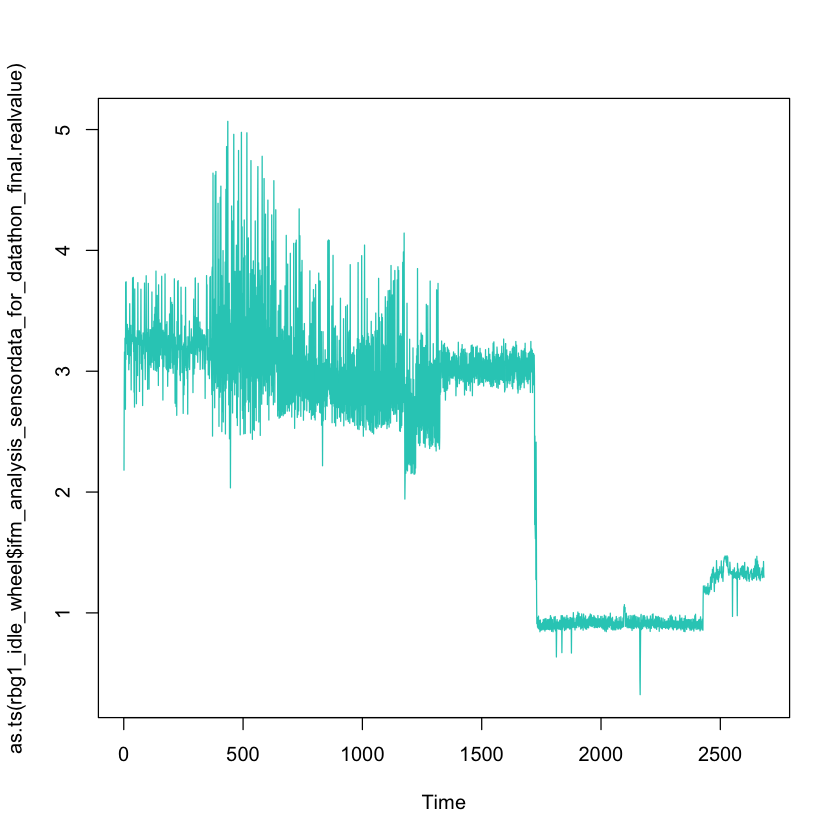

In [8]:
plot(as.ts(rbg1_idle_wheel$ifm_analysis_sensordata_for_datathon_final.realvalue), col = "#27ccc0", lwd = 1)

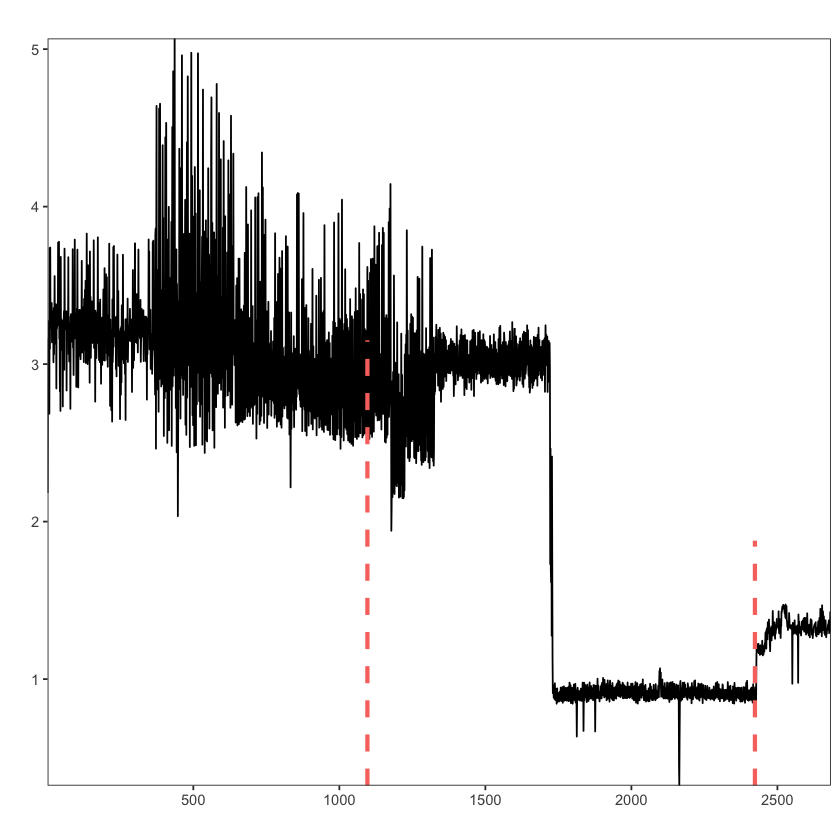

In [17]:
res = breakout(rbg1_idle_wheel$ifm_analysis_sensordata_for_datathon_final.realvalue, min.size=10, 
               method='multi', beta=.001, degree=1, plot=TRUE)
res$plot

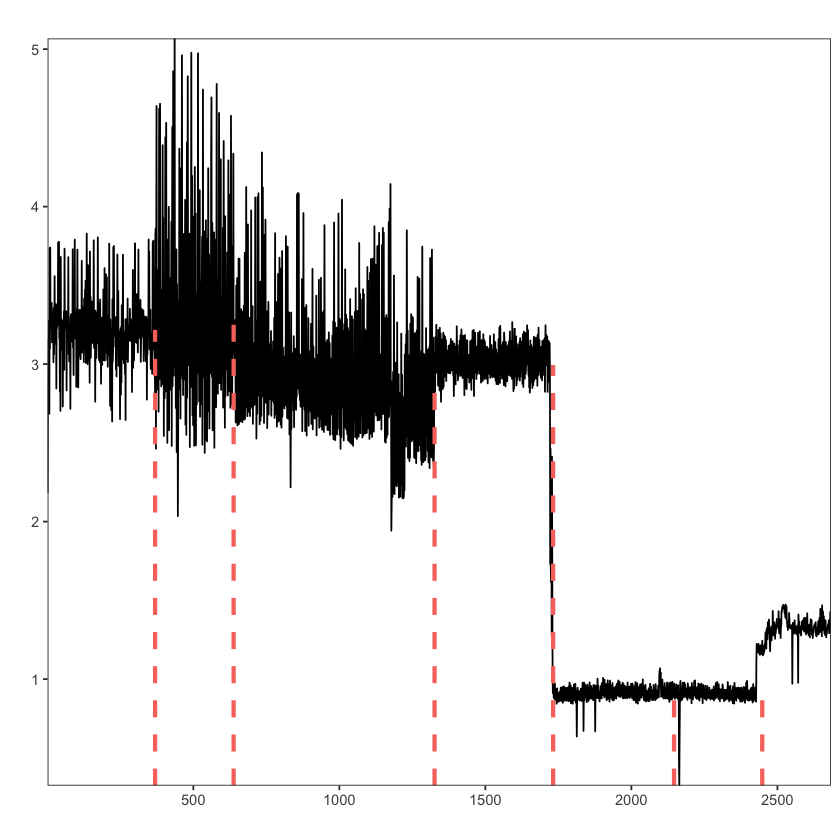

In [46]:
res = breakout(rbg1_idle_wheel$ifm_analysis_sensordata_for_datathon_final.realvalue, min.size=200, 
               method='multi', beta=0.0002, degree=1, plot=TRUE )
res$plot

In [13]:
install.packages("ecp")
library(ecp)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Rcpp


Figure below shows that the algorithm is able to distinguish the multiple breakout points in the time series.

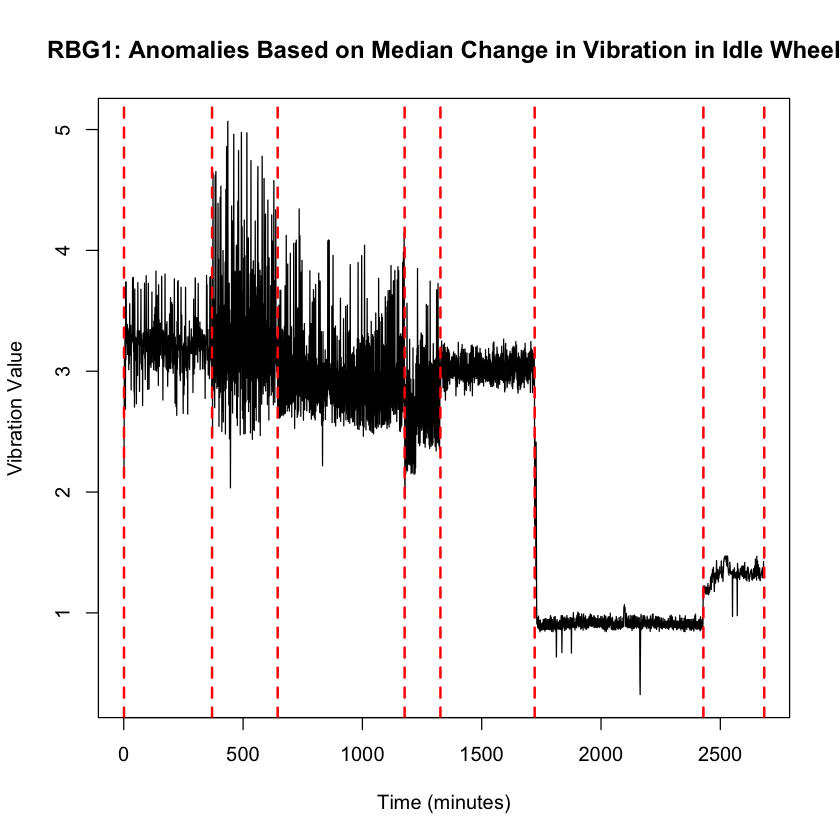

In [59]:
ediv = e.divisive(as.matrix(rbg1_idle_wheel$ifm_analysis_sensordata_for_datathon_final.realvalue), min.size=120, 
                  alpha=1.5)

plot(as.ts(rbg1_idle_wheel$ifm_analysis_sensordata_for_datathon_final.realvalue), 
     main='RBG1: Anomalies Based on Median Change in Vibration in Idle Wheel',
     xlab="Time (minutes)",
    ylab="Vibration Value")

abline(v=ediv$estimates,col="red", lwd=2, lty=2)

References:
https://blog.twitter.com/engineering/en_us/a/2014/breakout-detection-in-the-wild.html